## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

## The Data

In [2]:
#read the dataset
df = pd.read_csv('K MEANS-ML.csv')
df.head()

,code,name,half_densi,air pollution_CO2_all_2019_s,air pollution_NOX_all_2019_s,air pollution_PM25_all_2019_s,BuildingHeights_LSOA_MEAN_mean_mean,GreenSpace_LSOA_Area,flow LSOA_None,HousingDensity_LSOA_Density,population density LSOA_density,restaurants_restaurants,supermarkets_supermarkets,culture LSOA sum_sum,noise LSOA_None
0,E01000037,Barking and Dagenham 003B,879,29189.48586,44.659262,5.393634,5.195145,1310708.44,10677.00000,0.002933,72.3,NaN,NaN,0,72.5
1,E01033729,Greenwich 030E,1405,43757.47906,55.957550,7.451447,6.237027,40355.58,13159.23529,0.002293,43.0,4.0,1.0,0,67.5
2,E01000038,Barking and Dagenham 003C,753,29956.52598,46.859682,5.476513,5.193183,492110.45,10677.00000,0.003043,67.6,2.0,1.0,0,57.0
3,E01033730,Greenwich 035D,837,40306.39041,57.602092,8.735474,8.632334,1038.72,11931.78261,0.014800,71.8,4.0,0.0,2,72.5
4,E01000039,Barking and Dagenham 003D,812,21961.63290,37.145190,8.955854,5.626285,45721.30,10677.00000,0.002967,10.5,0.0,0.0,0,57.0


In [3]:
df.shape

(4719, 15)

In [4]:
df.fillna(0, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4719 entries, 0 to 4718
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   code                                 4719 non-null   object 
 1   name                                 4719 non-null   object 
 2   half_densi                           4719 non-null   int64  
 3   air pollution_CO2_all_2019_s         4719 non-null   float64
 4   air pollution_NOX_all_2019_s         4719 non-null   float64
 5   air pollution_PM25_all_2019_s        4719 non-null   float64
 6   BuildingHeights_LSOA_MEAN_mean_mean  4719 non-null   float64
 7   GreenSpace_LSOA_Area                 4719 non-null   float64
 8   flow LSOA_None                       4719 non-null   float64
 9   HousingDensity_LSOA_Density          4719 non-null   float64
 10  population density LSOA_density      4719 non-null   float64
 11  restaurants_restaurants       

In [6]:
df.columns

Index(['code', 'name', 'half_densi', 'air pollution_CO2_all_2019_s',
       'air pollution_NOX_all_2019_s', 'air pollution_PM25_all_2019_s',
       'BuildingHeights_LSOA_MEAN_mean_mean', 'GreenSpace_LSOA_Area',
       'flow LSOA_None', 'HousingDensity_LSOA_Density',
       'population density LSOA_density', 'restaurants_restaurants',
       'supermarkets_supermarkets', 'culture LSOA sum_sum', 'noise LSOA_None'],
      dtype='object')

## Clean DATA

In [7]:
data=df[['half_densi', 'air pollution_CO2_all_2019_s',
       'air pollution_NOX_all_2019_s', 'air pollution_PM25_all_2019_s',
       'BuildingHeights_LSOA_MEAN_mean_mean', 'GreenSpace_LSOA_Area',
       'flow LSOA_None', 'HousingDensity_LSOA_Density',
       'population density LSOA_density', 'restaurants_restaurants',
       'supermarkets_supermarkets', 'culture LSOA sum_sum', 'noise LSOA_None']]

In [8]:
data.shape

(4719, 13)

In [9]:
data.head()

,half_densi,air pollution_CO2_all_2019_s,air pollution_NOX_all_2019_s,air pollution_PM25_all_2019_s,BuildingHeights_LSOA_MEAN_mean_mean,GreenSpace_LSOA_Area,flow LSOA_None,HousingDensity_LSOA_Density,population density LSOA_density,restaurants_restaurants,supermarkets_supermarkets,culture LSOA sum_sum,noise LSOA_None
0,879,29189.48586,44.659262,5.393634,5.195145,1310708.44,10677.00000,0.002933,72.3,0.0,0.0,0,72.5
1,1405,43757.47906,55.957550,7.451447,6.237027,40355.58,13159.23529,0.002293,43.0,4.0,1.0,0,67.5
2,753,29956.52598,46.859682,5.476513,5.193183,492110.45,10677.00000,0.003043,67.6,2.0,1.0,0,57.0
3,837,40306.39041,57.602092,8.735474,8.632334,1038.72,11931.78261,0.014800,71.8,4.0,0.0,2,72.5
4,812,21961.63290,37.145190,8.955854,5.626285,45721.30,10677.00000,0.002967,10.5,0.0,0.0,0,57.0


In [10]:
data.isnull().values.any()

False

In [11]:
datalocation=df[['code']]

In [12]:
datalocation.head()

,code
0,E01000037
1,E01033729
2,E01000038
3,E01033730
4,E01000039


## Visualisation

In [13]:
data.corr()

,half_densi,air pollution_CO2_all_2019_s,air pollution_NOX_all_2019_s,air pollution_PM25_all_2019_s,BuildingHeights_LSOA_MEAN_mean_mean,GreenSpace_LSOA_Area,flow LSOA_None,HousingDensity_LSOA_Density,population density LSOA_density,restaurants_restaurants,supermarkets_supermarkets,culture LSOA sum_sum,noise LSOA_None
half_densi,1.000000,0.081831,0.113987,0.108217,0.011548,-0.029876,0.052095,0.044980,0.064099,0.125325,0.193820,0.106001,0.140981
air pollution_CO2_all_2019_s,0.081831,1.000000,0.883695,0.626007,0.250228,-0.014444,0.069523,0.160545,0.068744,0.239084,0.165057,0.276561,0.148581
air pollution_NOX_all_2019_s,0.113987,0.883695,1.000000,0.692499,0.266985,-0.016491,0.123536,0.120817,0.014217,0.296889,0.200601,0.329956,0.175663
air pollution_PM25_all_2019_s,0.108217,0.626007,0.692499,1.000000,0.306925,-0.017778,0.133038,0.125251,0.005086,0.502270,0.284727,0.555378,0.194656
BuildingHeights_LSOA_MEAN_mean_mean,0.011548,0.250228,0.266985,0.306925,1.000000,-0.047620,-0.009696,0.610697,0.549128,0.247511,0.143090,0.270655,0.119493
GreenSpace_LSOA_Area,-0.029876,-0.014444,-0.016491,-0.017778,-0.047620,1.000000,0.010397,-0.064887,-0.068422,-0.028490,-0.038623,-0.022428,-0.014193
flow LSOA_None,0.052095,0.069523,0.123536,0.133038,-0.009696,0.010397,1.000000,-0.088817,-0.106876,0.022408,0.064546,0.007939,0.399485
HousingDensity_LSOA_Density,0.044980,0.160545,0.120817,0.125251,0.610697,-0.064887,-0.088817,1.000000,0.685143,0.071350,0.049484,0.108179,0.088283
population density LSOA_density,0.064099,0.068744,0.014217,0.005086,0.549128,-0.068422,-0.106876,0.685143,1.000000,-0.000188,-0.031511,0.032276,0.023399
restaurants_restaurants,0.125325,0.239084,0.296889,0.502270,0.247511,-0.028490,0.022408,0.071350,-0.000188,1.000000,0.642453,0.628307,0.155376


Text(0.5, 1.0, 'Heatmap of data correlation')

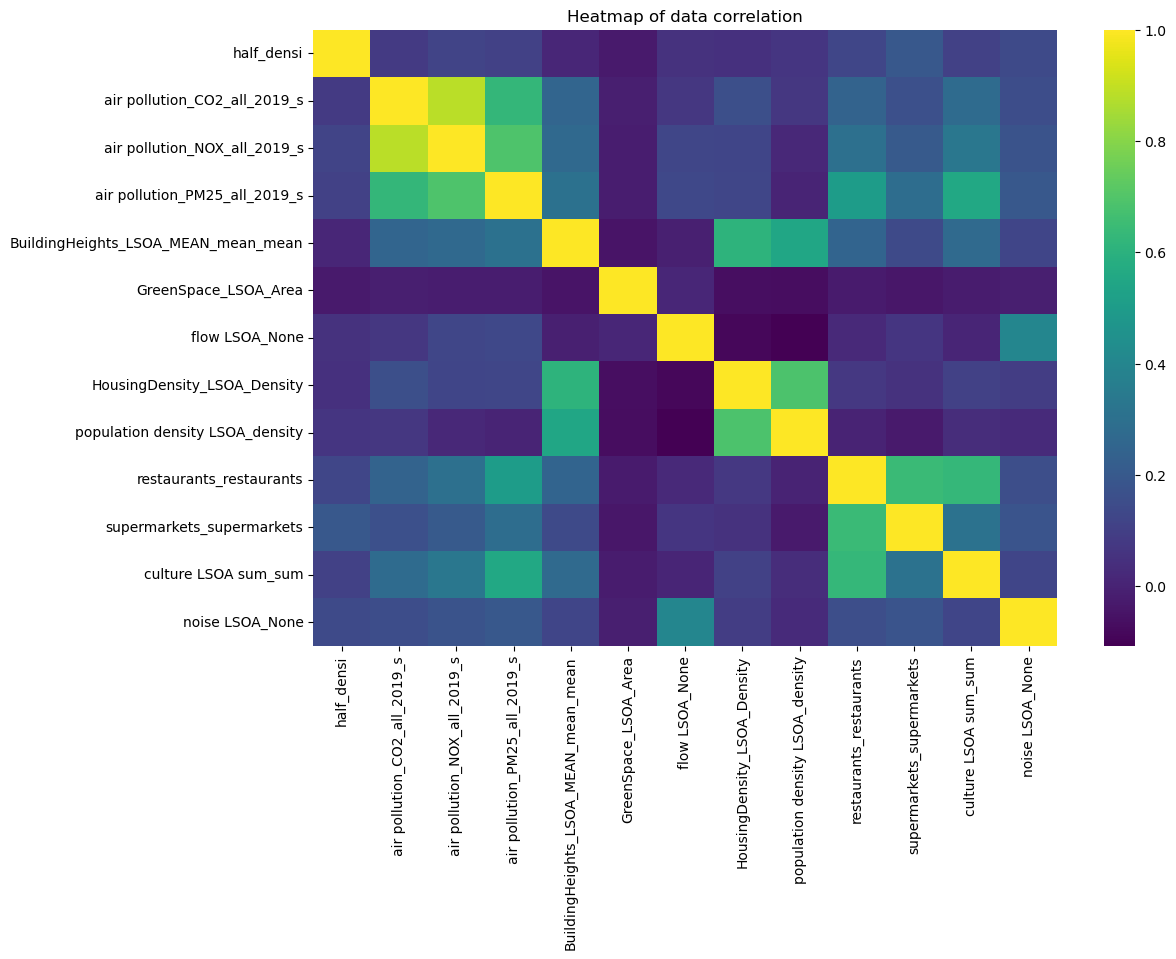

In [14]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(data.corr(), cmap = 'viridis')
plt.title('Heatmap of data correlation')

C:\Users\15809\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\15809\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\15809\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\15809\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

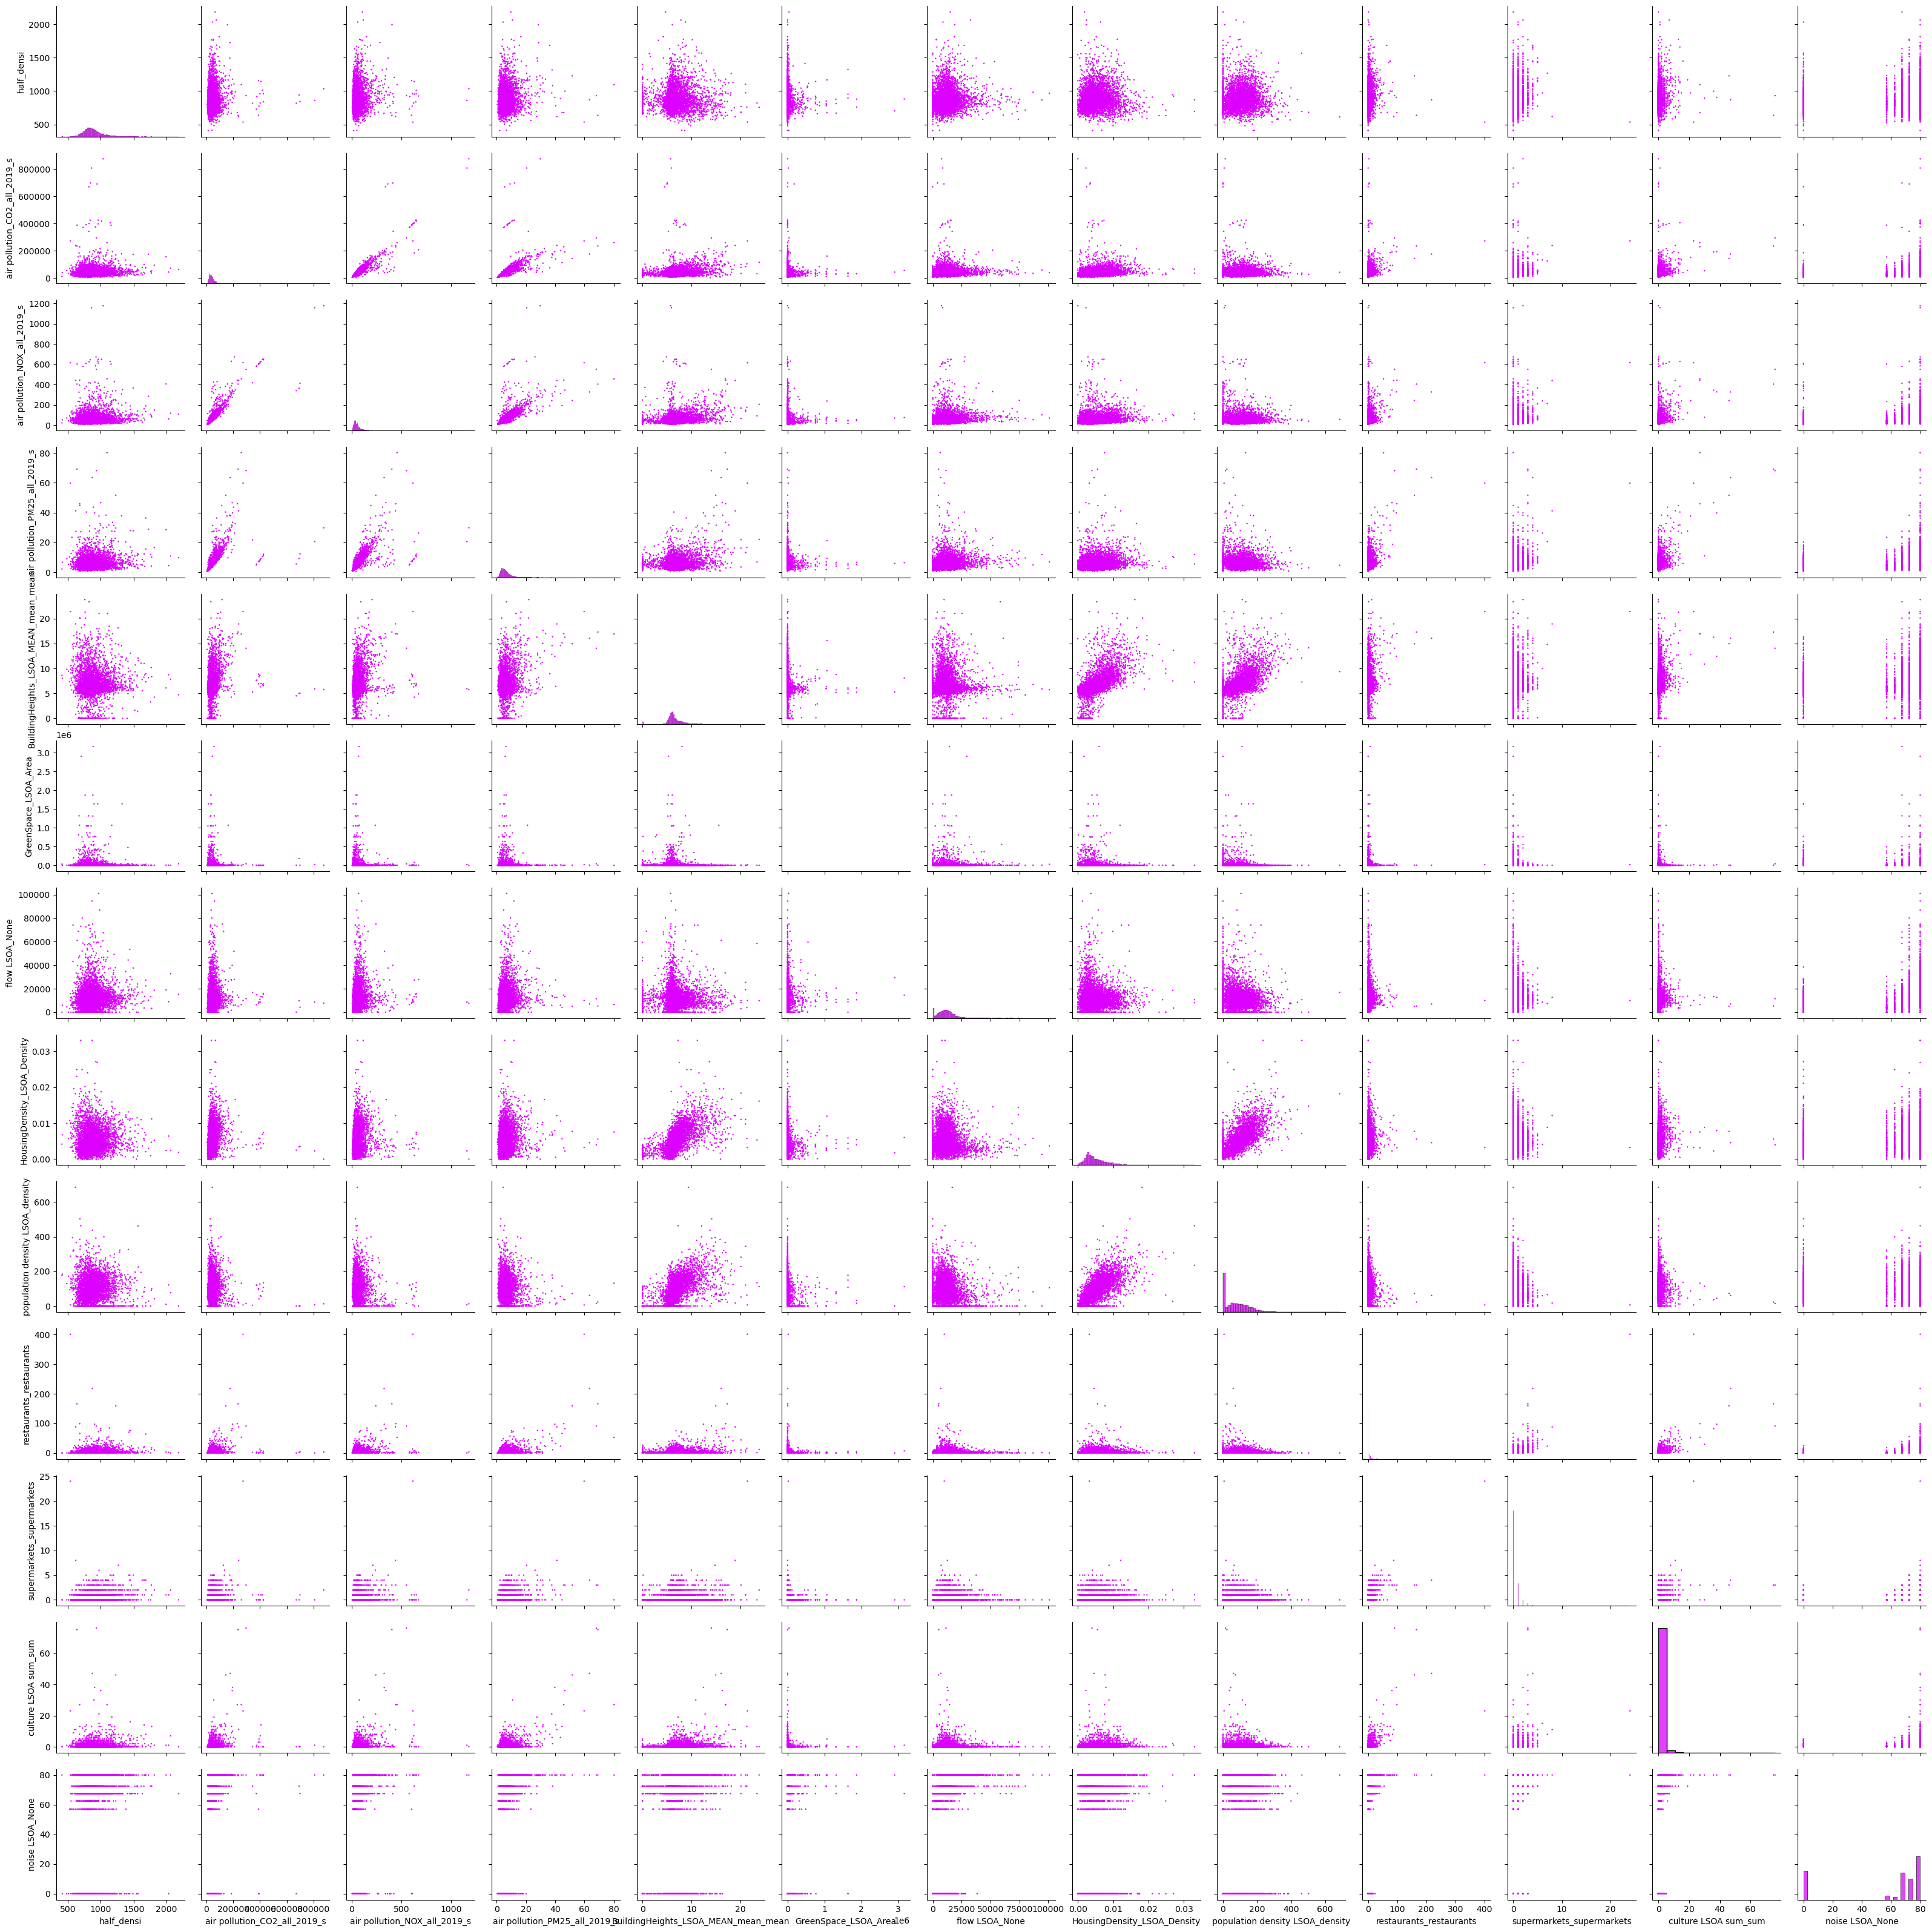

In [15]:
#Pairplot of all data
fig=sns.pairplot(df, 
                 plot_kws=dict(edgecolor="none", color='#dc00ff',s=3),
                 diag_kws={'color': '#dc00ff'})
#plt.suptitle("Pairplots")

## DIVIDE DATA FOR ANALYSIS

In [16]:
#the data should be doublicated in order to run the analysis independantly
data1=data.copy()
data2=data.copy()

# Alternative you can divide the code into 2 files. DO NOT USE PCA data in KMEANS or the opposite

## K-Means Clustering

### A. Define the number of clusters (Elbow method)

In [17]:
#Fit data and calculate sum of squares(wss)
wss=[]
from sklearn.cluster import KMeans

for i in range (1,21):    
    kmeans=KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(data1)
    wss.append(kmeans.inertia_)

C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

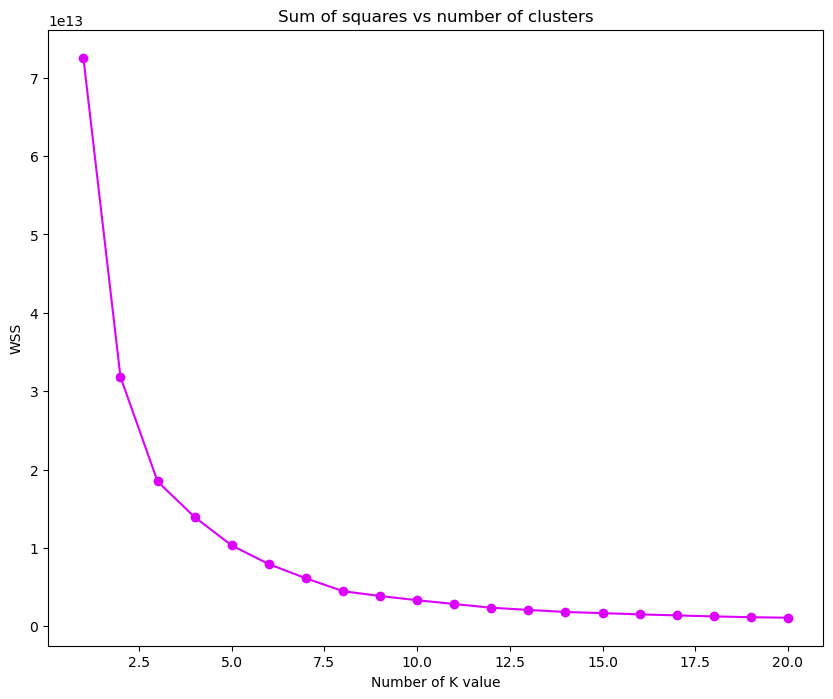

In [18]:
#Visualisation of the k values in order to define the fittest
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wss,marker="o", color="#dc00ff")
plt.xlabel("Number of K value")
plt.ylabel("WSS")
plt.title("Sum of squares vs number of clusters")
#plt.savefig("Elbow.png", dpi=300,transparent=True)
plt.show()

### B.Clustering the data

In [19]:
#import library
from sklearn.cluster import KMeans

In [21]:
#pick number of clusters
kmeans = KMeans(n_clusters=4)

In [22]:
#fit the data
kmeans.fit(data1)

C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [23]:
#find the cluster centers
kmeans.cluster_centers_

array([[8.84205761e+02, 4.40788758e+04, 6.12939044e+01, 6.40704255e+00,
        6.85375726e+00, 8.79206400e+03, 1.24948360e+04, 5.14986334e-03,
        7.85637643e+01, 3.66861598e+00, 3.82282868e-01, 6.65150531e-01,
        5.69265757e+01],
       [8.75785714e+02, 4.49337370e+04, 5.97140875e+01, 6.36365257e+00,
        6.95934521e+00, 1.35176905e+06, 1.12840721e+04, 4.61371057e-03,
        5.57928571e+01, 1.21428571e+00, 7.14285714e-02, 5.00000000e-01,
        6.41071429e+01],
       [8.45174419e+02, 3.76559575e+04, 5.31483711e+01, 5.79811955e+00,
        6.12225534e+00, 4.38977607e+05, 1.22648518e+04, 3.70768758e-03,
        4.45441860e+01, 1.90697674e+00, 2.32558140e-01, 2.32558140e-01,
        4.81802326e+01],
       [7.93500000e+02, 5.04580272e+04, 7.14546255e+01, 6.08545850e+00,
        6.68343900e+00, 3.03385766e+06, 2.20012708e+04, 3.85951800e-03,
        5.60000000e+01, 3.50000000e+00, 0.00000000e+00, 5.00000000e-01,
        7.37500000e+01]])

In [24]:
#identify cluster labels
kmeans.labels_

array([1, 0, 2, ..., 0, 0, 0])

In [25]:
#identify length of cluster labels
len(kmeans.labels_)

4719

In [26]:
#Add cluster column in dataset
data1['CLUSTERS'] = kmeans.fit_predict(data1)

C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
data1.head()

,half_densi,air pollution_CO2_all_2019_s,air pollution_NOX_all_2019_s,air pollution_PM25_all_2019_s,BuildingHeights_LSOA_MEAN_mean_mean,GreenSpace_LSOA_Area,flow LSOA_None,HousingDensity_LSOA_Density,population density LSOA_density,restaurants_restaurants,supermarkets_supermarkets,culture LSOA sum_sum,noise LSOA_None,CLUSTERS
0,879,29189.48586,44.659262,5.393634,5.195145,1310708.44,10677.00000,0.002933,72.3,0.0,0.0,0,72.5,3
1,1405,43757.47906,55.957550,7.451447,6.237027,40355.58,13159.23529,0.002293,43.0,4.0,1.0,0,67.5,0
2,753,29956.52598,46.859682,5.476513,5.193183,492110.45,10677.00000,0.003043,67.6,2.0,1.0,0,57.0,1
3,837,40306.39041,57.602092,8.735474,8.632334,1038.72,11931.78261,0.014800,71.8,4.0,0.0,2,72.5,0
4,812,21961.63290,37.145190,8.955854,5.626285,45721.30,10677.00000,0.002967,10.5,0.0,0.0,0,57.0,0


### C.Visualise your Kmeans result

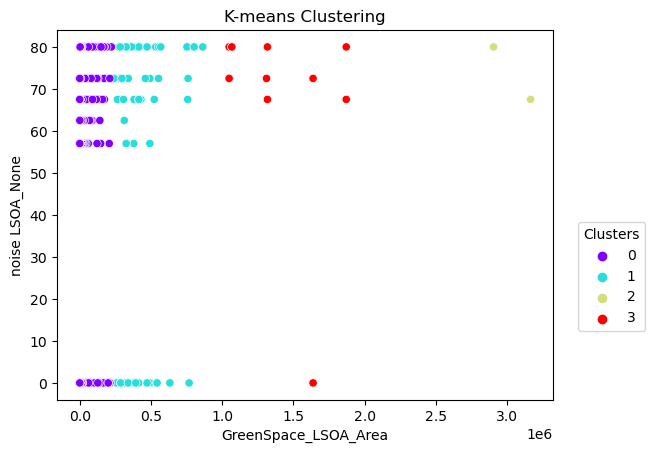

In [38]:
#Scatterplot of clustered data
sns.scatterplot(x=data1['GreenSpace_LSOA_Area'], y=data1['noise LSOA_None'], hue= kmeans.labels_, palette='rainbow')
plt.title('K-means Clustering')
plt.legend(loc=0,bbox_to_anchor=(1.2,0.5),title="Clusters")
plt.show()

## Principal Component Analysis

### A. Preprocessing

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
scaler.fit(data2)

StandardScaler()

In [41]:
scaled_data = scaler.transform(data2)

### B. Running PCA

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=3)

In [44]:
pca.fit(scaled_data)

PCA(n_components=3)

In [45]:
x_pca = pca.transform(scaled_data)

In [46]:
scaled_data.shape #15 dimensions

(4719, 13)

In [47]:
x_pca.shape #3 dimensions

(4719, 3)

### C.Interpretation of results

In [48]:
pca.components_

array([[ 0.11588044,  0.37918902,  0.40187796,  0.42928645,  0.28995283,
        -0.03341332,  0.0764282 ,  0.19627396,  0.12691416,  0.35762364,
         0.26830363,  0.34844962,  0.17330605],
       [ 0.04693404,  0.07707915,  0.12339424,  0.14481174, -0.43431716,
         0.07166893,  0.19357865, -0.55743512, -0.58666934,  0.15800494,
         0.16205341,  0.10248071,  0.08817542],
       [ 0.16154322, -0.45550374, -0.42332295, -0.14163724,  0.02706513,
        -0.07575852, -0.18276535,  0.01057837,  0.02787378,  0.46476384,
         0.47954912,  0.27869923, -0.05240949]])

In [49]:
df_comp = pd.DataFrame(pca.components_,columns=data2.columns)

<Axes: >

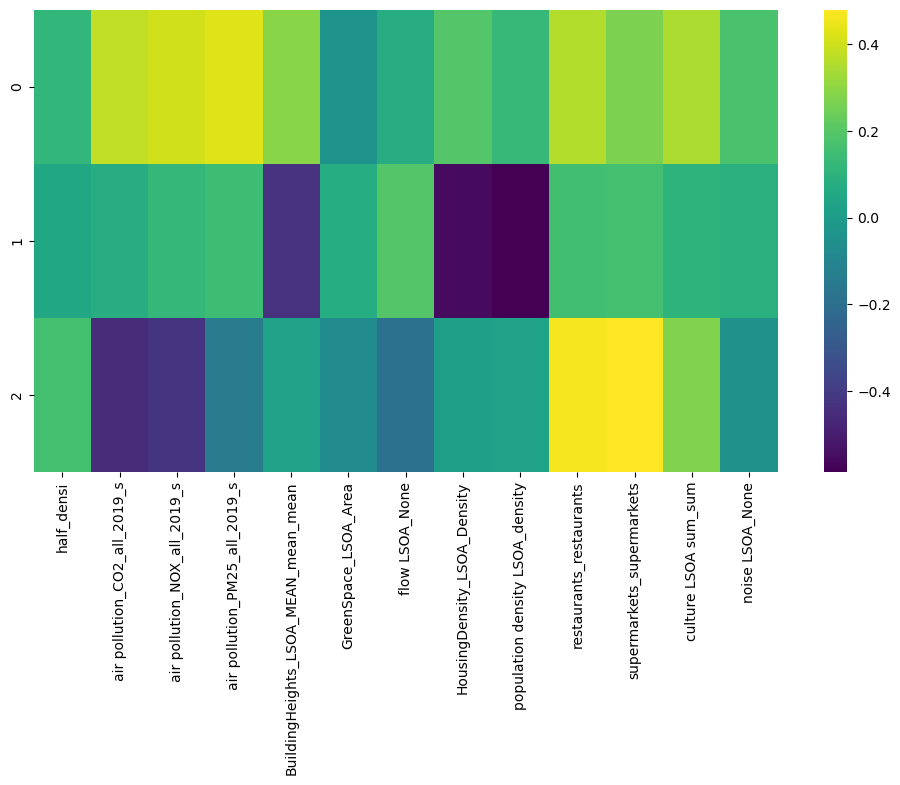

In [50]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='viridis')

In [51]:
cmap = sns.diverging_palette(180, 295, s=100, l=50,
                                  n=10, center= "dark", as_cmap = True)

#Documentation: https://seaborn.pydata.org/generated/seaborn.diverging_palette.html

<Axes: >

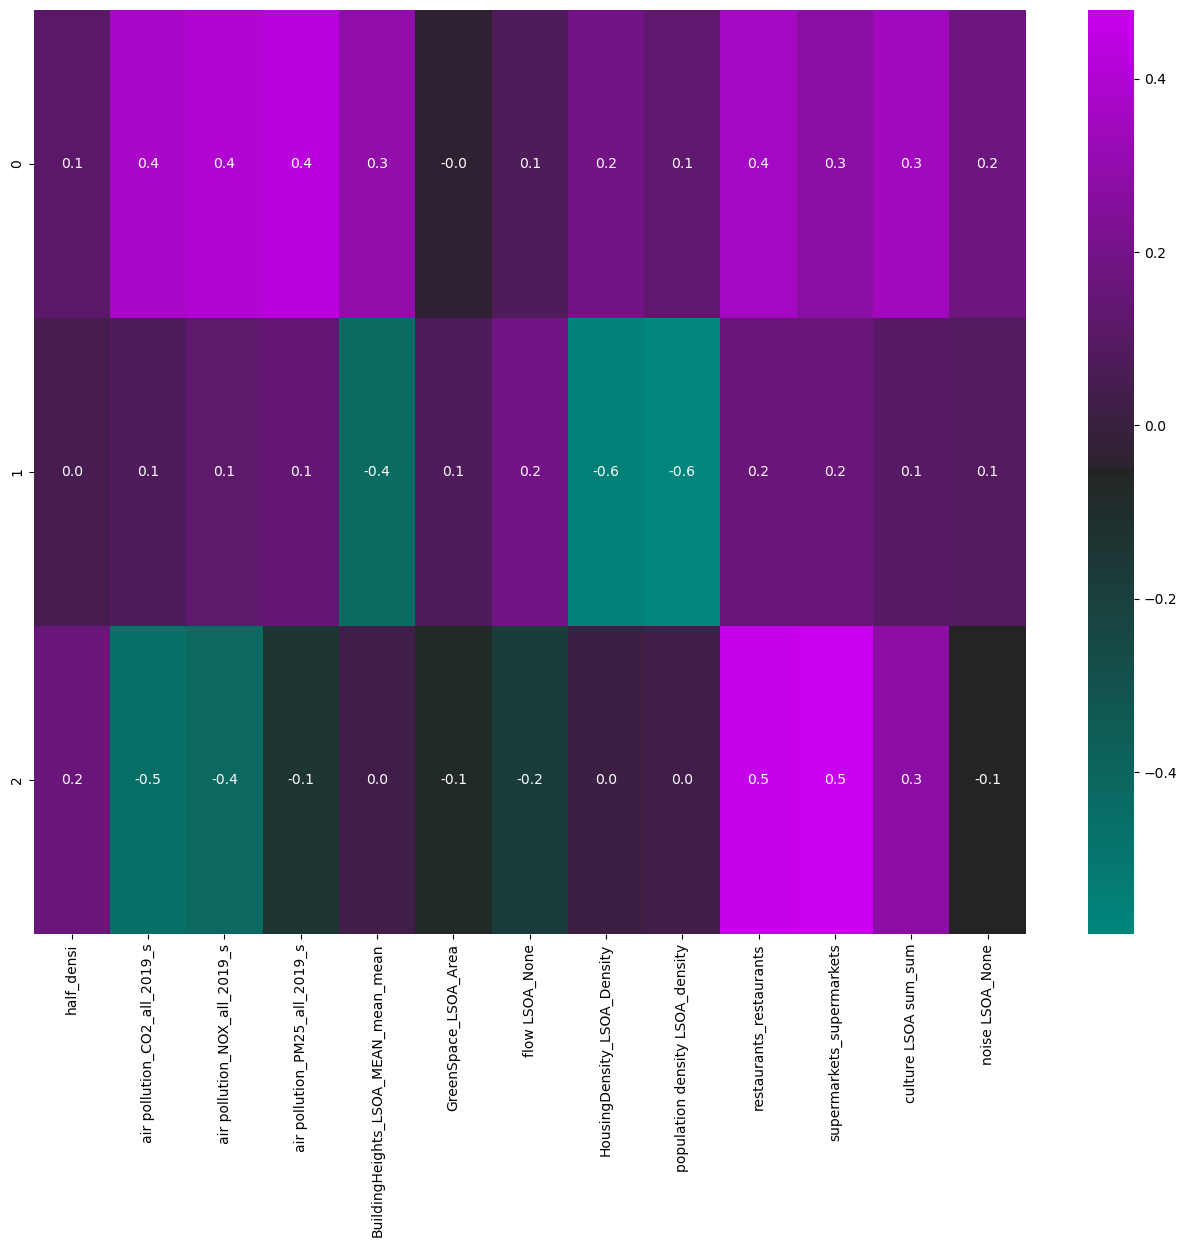

In [52]:
plt.figure(figsize=(16,12))
sns.heatmap(df_comp,cmap= cmap, annot=True,fmt = ".1f")

In [53]:
df_comp.head()

,half_densi,air pollution_CO2_all_2019_s,air pollution_NOX_all_2019_s,air pollution_PM25_all_2019_s,BuildingHeights_LSOA_MEAN_mean_mean,GreenSpace_LSOA_Area,flow LSOA_None,HousingDensity_LSOA_Density,population density LSOA_density,restaurants_restaurants,supermarkets_supermarkets,culture LSOA sum_sum,noise LSOA_None
0,0.115880,0.379189,0.401878,0.429286,0.289953,-0.033413,0.076428,0.196274,0.126914,0.357624,0.268304,0.348450,0.173306
1,0.046934,0.077079,0.123394,0.144812,-0.434317,0.071669,0.193579,-0.557435,-0.586669,0.158005,0.162053,0.102481,0.088175
2,0.161543,-0.455504,-0.423323,-0.141637,0.027065,-0.075759,-0.182765,0.010578,0.027874,0.464764,0.479549,0.278699,-0.052409


In [54]:
df=pd.DataFrame(x_pca, columns = ['0','1','2'])

In [55]:
df.head()

,0,1,2
0,-1.308495,1.245016,-0.987543
1,0.324711,1.194438,0.764810
2,-0.836162,0.914998,0.071194
3,1.061363,-1.866016,-0.060199
4,-0.927976,0.900641,-0.203593


In [56]:
datalocation.head()

,code
0,E01000037
1,E01033729
2,E01000038
3,E01033730
4,E01000039


In [57]:
df_prefinal=pd.concat([df,datalocation],axis=1)

In [58]:
df_prefinal.head()

,0,1,2,code
0,-1.308495,1.245016,-0.987543,E01000037
1,0.324711,1.194438,0.764810,E01033729
2,-0.836162,0.914998,0.071194,E01000038
3,1.061363,-1.866016,-0.060199,E01033730
4,-0.927976,0.900641,-0.203593,E01000039


In [59]:
df_final=pd.concat([df_prefinal, data1],axis=1)

In [60]:
df_final.head()

,0,1,2,code,half_densi,air pollution_CO2_all_2019_s,air pollution_NOX_all_2019_s,air pollution_PM25_all_2019_s,BuildingHeights_LSOA_MEAN_mean_mean,GreenSpace_LSOA_Area,flow LSOA_None,HousingDensity_LSOA_Density,population density LSOA_density,restaurants_restaurants,supermarkets_supermarkets,culture LSOA sum_sum,noise LSOA_None,CLUSTERS
0,-1.308495,1.245016,-0.987543,E01000037,879,29189.48586,44.659262,5.393634,5.195145,1310708.44,10677.00000,0.002933,72.3,0.0,0.0,0,72.5,3
1,0.324711,1.194438,0.764810,E01033729,1405,43757.47906,55.957550,7.451447,6.237027,40355.58,13159.23529,0.002293,43.0,4.0,1.0,0,67.5,0
2,-0.836162,0.914998,0.071194,E01000038,753,29956.52598,46.859682,5.476513,5.193183,492110.45,10677.00000,0.003043,67.6,2.0,1.0,0,57.0,1
3,1.061363,-1.866016,-0.060199,E01033730,837,40306.39041,57.602092,8.735474,8.632334,1038.72,11931.78261,0.014800,71.8,4.0,0.0,2,72.5,0
4,-0.927976,0.900641,-0.203593,E01000039,812,21961.63290,37.145190,8.955854,5.626285,45721.30,10677.00000,0.002967,10.5,0.0,0.0,0,57.0,0


In [61]:
df_final.to_csv('FinalResult.csv', encoding='utf-8', index=False)